# Optimization Models in Python
This notebook presents an overview of simple methods for linear and nonlinear programming using readily accessible Python libraries. To keep things familiar, we review common examples from Tepper's own Optimization course, focusing on the differences between Excel and Python implementations.

## Linear Programming Using the PuLP Library
We begin with a simple linear programming example. Tepper students will recall Willem's example of the farmer who must choose between planting corn and wheat. 

Recall the following:

> A farmer wishes to maximize their profit from planting corn and/or wheat. Assume that each acre of corn nets the farmer \$300 and requires 2 units of labor and 4 units of fertilizer. Each acre of wheat yields \$200, and uses 3 units of labor and 2 units of fertilizer. The farmer can plant at most 60 acres total and has 100 units of labor and 120 units of fertilizer available.

<table>
<tr>
    <th>Resource</th><th>Profit</th><th>Labor</th><th>Fertilizer</th>
</tr>
<tr>
    <td><strong>Corn</strong></td><td>\$300</td><td>2</td><td>4</td>
</tr>
<tr>
    <td><strong>Wheat</strong></td><td>\$200</td><td>3</td><td>2</td>
</tr>
<tr>
    <th>Constraints</th><th>N/A</th><th>100</th><th>120</th>
</tr>
</table>

In [5]:
import pulp as plp # bring in the PuLP library. We can access PuLP functions by prefixing them with plp.

# declare variables
corn  = plp.LpVariable("corn")
wheat = plp.LpVariable("wheat")

labor_corn  = 2*corn
labor_wheat = 3*wheat

fert_corn = 4*corn
fert_wheat = 2*wheat

profit_corn = 300*corn
profit_wheat = 200*wheat

# Set resource limits
labor_limit = 100
fert_limit = 120
land_limit = 60

# define the problem
prob = plp.LpProblem("Farmer", plp.LpMaximize)

# define constraints
prob += labor_corn + labor_wheat <= labor_limit  # labor constraint
prob += fert_corn + fert_wheat <= fert_limit     # fertilizer constraint
prob += corn >= 0                                # non-negativity
prob += wheat >= 0                               # non-negativity
prob += wheat + corn <= land_limit               # land constraint

# define the objective function to maximize
prob += profit_corn + profit_wheat

print("Problem Created Successfully")

Problem Created Successfully


### Investigating the Problem Structure
The PuLP library creates a convenient data structure that describes the problem in an easy to read way. We see this below.

In [6]:
print(prob)

Farmer:
MAXIMIZE
300*corn + 200*wheat + 0
SUBJECT TO
_C1: 2 corn + 3 wheat <= 100

_C2: 4 corn + 2 wheat <= 120

_C3: corn >= 0

_C4: wheat >= 0

_C5: corn + wheat <= 60

VARIABLES
corn free Continuous
wheat free Continuous



## Plotting the Feasible Region

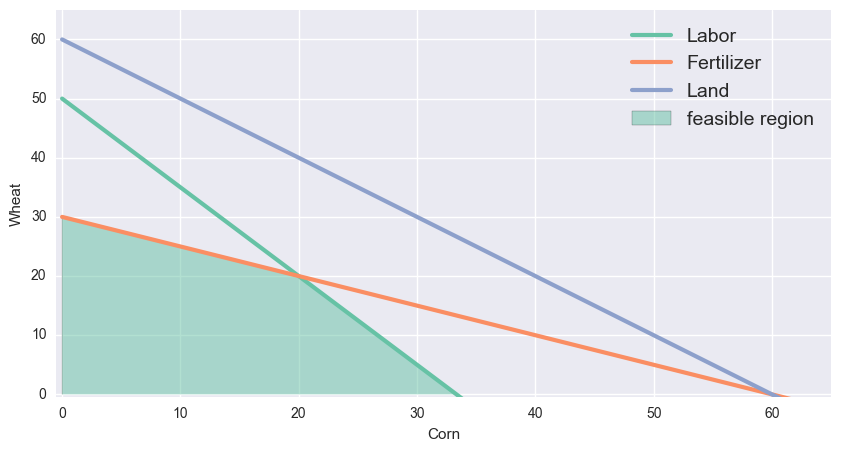

In [7]:
# matplotlib is a very useful library for plotting in python
from matplotlib import pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import numpy as np

# Seaborn allows us to set a nice color palette
import seaborn as sns
sns.set_palette('Set2')

# Create plot object
fig, ax = plt.subplots(figsize=(10,5))
s = np.linspace(0,100)

# add labor constraint
plt.plot(s, 50-3*s/2, lw=3, label="Labor")

# add fertilizer constraint
plt.plot(s, 30-s/2, lw=3, label="Fertilizer")

# add land constraint
plt.plot(s, 60-s, lw=3, label="Land")

# highlight the feasible region
path = Path([
        (0., 0.),
        (0., 30.),
        (20., 20.),
        (100/3, 0.)
])
patch = PathPatch(path, label="feasible region", alpha=0.5)
ax.add_patch(patch)

# label axes and lines
plt.xlabel('Corn')
plt.ylabel('Wheat')
plt.xlim(-0.5, 65)
plt.ylim(-0.5, 65)
plt.legend(fontsize=14)
plt.show()


In [8]:
# solve the problem
status = prob.solve(plp.GLPK(msg=0))

print("The optimal solution is given by: ")
print("Corn = ", plp.value(corn))
print("Wheat = ", plp.value(wheat))

print("Profit = ", plp.value(prob.objective))

The optimal solution is given by: 
Corn =  20.0
Wheat =  20.0
Profit =  10000.0
